# Notebook for plotting ComCam gains.

Adapted to AuxTel on 11 Apr 2022\
Initially written 18 Feb 2022 by Craig Lage.

In [228]:
date = '05May22'
print(f'Running this code on {date}')

Running this code on 05May22


In [229]:
import sys, os, glob, time
import numpy as np
import astropy.io.fits as pf
import matplotlib.pyplot as plt
import lsst.daf.butler as dafButler

In [230]:
exposure1 = 2021021700114
butler1 = dafButler.Butler("/repo/main", collections=["LATISS/raw/all","LATISS/calib",
                                                      "u/cslage/latiss/ptc_20210217"])

exposure2 = 2022040500139
butler2 = dafButler.Butler("/repo/main", collections=["LATISS/raw/all","LATISS/calib",
                                                      "u/jesteves/latiss/ptc_20220405_flat"])

exposure3 = 2022050400134
butler3 = dafButler.Butler("/repo/main", collections=["LATISS/raw/all","LATISS/calib",
                                                      "u/jesteves/latiss/ptc_20220504_flat"])

exposure4 = 2022050500260
butler4 = dafButler.Butler("/repo/main", collections=["LATISS/raw/all","LATISS/calib",
                                                      "u/jesteves/latiss/ptc_20220505"])

In [231]:
RAFT = 'RXX'
butlers = [butler1, butler2, butler3, butler4]
exposures = [exposure1, exposure2, exposure3, exposure4]
run_names = ['Feb2021-Empty', 'Mar2022-SDSSr', 'May2022-SDSSi', 'May2022-SDSSg']
markers = ['o', 'x', 'P', '*', '^', 'v']

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')
sns.set_style('whitegrid')

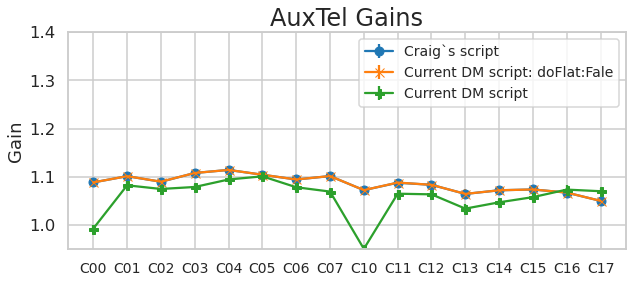

In [237]:
plt.figure(figsize=(10,4))
plt.title("AuxTel Gains", fontsize=24)
for i,butler in enumerate(butlers):
    run_name = run_names[i]
    ptcDataset = butler.get('ptc', exposure=exposures[i], detector=0)
    gain_data = ptcDataset.gain
    gain_err_data = ptcDataset.gainErr
    amps = gain_data.keys()
    gains = []
    gain_err = []
    amp_nums = []
    for ii, amp in enumerate(amps):
        gains.append(gain_data[amp])
        gain_err.append(gain_err_data[amp])
        amp_nums.append(ii)
    plt.errorbar(amp_nums, gains, yerr=gain_err, marker = markers[i], label = run_name)
    plt.ylim(0.95, 1.4)
    plt.ylabel("Gain")
    plt.xticks(amp_nums,amps, fontsize=14)
    plt.legend(loc = 'upper right', fontsize = 14)

plt.savefig(f'./plots/Gain_Summary_{date}.pdf',dpi=100)

In [234]:
exposure2a = 2022040500096
butler2a = dafButler.Butler("/repo/main", collections=["LATISS/raw/all","LATISS/calib",
                                                      "u/jesteves/latiss/ptc_20220405"])
exposure2b = 2022040500096
butler2b = dafButler.Butler("/repo/main", collections=["LATISS/raw/all","LATISS/calib",
                                                      "u/jesteves/latiss/ptc_20220405_flat"])

exposure2c = 2022040500096
butler2c = dafButler.Butler("/repo/main", collections=["LATISS/raw/all","LATISS/calib",
                                                      "u/jesteves/latiss/ptc_20220405_rerun"])

In [235]:
RAFT = 'RXX'
butlers = [butler2a, butler2b, butler2c]
exposures = [exposure2a, exposure2b, exposure2c]
run_names = ['Craig`s script','Current DM script: doFlat:Fale', 'Current DM script']
markers = ['o', 'x', 'P', '*', '^', 'v']

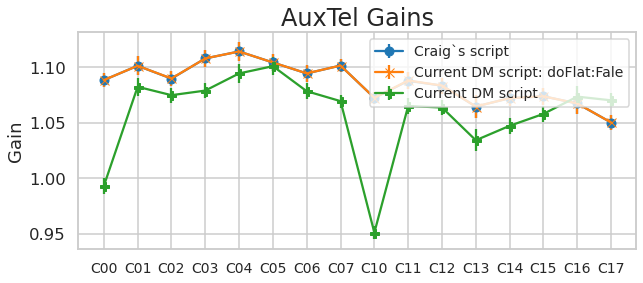

In [236]:
plt.figure(figsize=(10,4))
plt.title("AuxTel Gains", fontsize=24)
for i,butler in enumerate(butlers):
    run_name = run_names[i]
    ptcDataset = butler.get('ptc', exposure=exposures[i], detector=0)
    gain_data = ptcDataset.gain
    gain_err_data = ptcDataset.gainErr
    amps = gain_data.keys()
    gains = []
    gain_err = []
    amp_nums = []
    for ii, amp in enumerate(amps):
        gains.append(gain_data[amp])
        gain_err.append(gain_err_data[amp])
        amp_nums.append(ii)
    plt.errorbar(amp_nums, gains, yerr=gain_err, marker = markers[i], label = run_name)
    # plt.ylim(0.95, 1.4)
    plt.ylabel("Gain")
    plt.xticks(amp_nums,amps, fontsize=14)
    plt.legend(loc = 'upper right', fontsize = 14)

plt.savefig(f'./plots/Gain_Compare_Scripts_{date}.pdf',dpi=100)

## Investigating the Diffences on Gain

Chris Stubs said that this could be due to:
<li> temperature dependence
<li> reduction artifacts
<li> temporal instability
</li>

Let's start by re-running the 20220504 exposure.

### Re-run the 20220504 exposure

Synthax:
```
pipetask run -j 32 -d "detector IN (0) AND instrument='LATISS' AND \
	 exposure IN (${obsDate}${flat_ptc0}..${obsDate}${flat_ptc1}) AND exposure.observation_type='flat'" \
	 -b /repo/main \
     -c isr:doFlat=False \
     -i LATISS/raw/all,LATISS/calib,LATISS/calib,u/jesteves/calib/latiss/calib.${obsDate} \
	 -o u/jesteves/latiss/ptc_${obsDate}_flat_rerun \
	 -p $CP_PIPE_DIR/pipelines/Latiss/cpPtc.yaml \
	 --register-dataset-types

```

In [ ]:
exposure3 = 2022050400134
butler3 = dafButler.Butler("/repo/main", collections=["LATISS/raw/all","LATISS/calib",
                                                      "u/jesteves/latiss/ptc_20220504_flat_rerun"])

RAFT = 'RXX'
butlers = [butler1, butler2, butler3, butler4]
exposures = [exposure1, exposure2, exposure3, exposure4]
run_names = ['Feb2021-Empty', 'Mar2022-SDSSr', 'May2022-SDSSi', 'May2022-SDSSg']
markers = ['o', 'x', 'P', '*', '^', 'v']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')

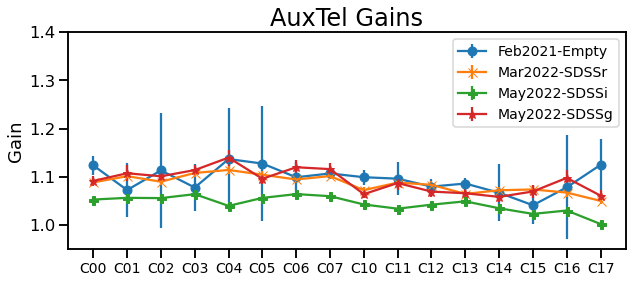

In [131]:
data = np.zeros(len(butlers), dtype=[('gain', float), 
                                     ('gain_err', float)])
plt.figure(figsize=(10,4))
plt.title("AuxTel Gains", fontsize=24)
for i,butler in enumerate(butlers):
    run_name = run_names[i]
    ptcDataset = butler.get('ptc', exposure=exposures[i], detector=0)
    gain_data = ptcDataset.gain
    gain_err_data = ptcDataset.gainErr
    amps = gain_data.keys()
    gains = []
    gain_err = []
    amp_nums = []
    for ii, amp in enumerate(amps):
        gains.append(gain_data[amp])
        gain_err.append(gain_err_data[amp])
        amp_nums.append(ii)
    plt.errorbar(amp_nums, gains, yerr=gain_err, marker = markers[i], label = run_name)
    plt.ylim(0.95, 1.4)
    plt.ylabel("Gain")
    plt.xticks(amp_nums,amps, fontsize=14)
    plt.legend(loc = 'upper right', fontsize = 14)
    data[i] = (np.nanmean(gains), np.sqrt(np.nanstd(gains)**2+np.nanmean(gain_err)**2))

# plt.savefig(f'./plots/Gain_Summary_{date}.pdf',dpi=100)

Still the same result. Let's try the temperature.

In [133]:
data

array([(1.09561699, 0.0585642 ), (1.08590589, 0.0189288 ),
       (1.04432231, 0.01654826), (1.09119877, 0.02678704)],
      dtype=[('gain', '<f8'), ('gain_err', '<f8')])

### Temperature Dependence


In [104]:
from lsst_efd_client import EfdClient, resample
from astropy.time import Time, TimeDelta

efd_client = EfdClient('summit_efd')

In [105]:
times = []
for i in range(len(exposures)):
    metadata = butler.get('raw.metadata', exposure=exposures[i], detector=0)
    times.append(Time(metadata.toDict()['DATE'], format='isot', scale='tai'))
    
times

[<Time object: scale='tai' format='isot' value=2021-02-17T21:01:56.072>,
 <Time object: scale='tai' format='isot' value=2022-04-05T20:45:16.936>,
 <Time object: scale='tai' format='isot' value=2022-05-04T20:20:43.615>,
 <Time object: scale='tai' format='isot' value=2022-05-05T21:07:12.695>]

In [181]:
temp_data = np.zeros(len(times), dtype=[('t1', float), 
                                        ('t1_err', float),
                                        ('t2', float), 
                                        ('t2_err', float)])

In [221]:
for i in range(len(times)):

    if exposures[i] < 20211013:
        # EFD was switched to UTC on 20211013.  This compensates for that.
        tai_offset = 37.0
    else:
        tai_offset = 0.0
        
    t1 = times[i] - TimeDelta(-10., format='sec', scale='tai')
    t2 = times[i] + TimeDelta(180., format='sec', scale='tai')

    res1 = await efd_client.select_time_series("lsst.sal.ATCamera.focal_plane_Reb", 
                                               ["aspicl_Temp00","aspicu_Temp00"], 
                                               t1.utc - TimeDelta(tai_offset, format='sec'), 
                                               t2.utc - TimeDelta(tai_offset, format='sec'))
    print(res1)
    if len(res1)>0:
        t1 = np.mean(res1['aspicl_Temp00'])
        t1_err = np.std(res1['aspicl_Temp00'])
        t2 = np.mean(res1['aspicu_Temp00'])
        t2_err = np.std(res1['aspicu_Temp00'])

    else:
        t1 = np.nan
        t1_err = np.nan
        t2 = np.nan
        t2_err = np.nan
        
    temp_data[i] = (t1,t1_err,t2,t2_err)


Empty DataFrame
Columns: []
Index: []
                                  aspicl_Temp00  aspicu_Temp00
2022-04-05 20:44:52.309000+00:00      16.383928      16.383928
2022-04-05 20:44:59.311000+00:00      16.339285      16.584822
2022-04-05 20:45:02.312000+00:00      16.339285      16.584822
2022-04-05 20:45:12.309000+00:00      16.383928      16.406250
2022-04-05 20:45:12.501000+00:00      16.383928      16.406250
2022-04-05 20:45:22.571000+00:00      16.406250      16.406250
2022-04-05 20:45:33.235000+00:00      16.406250      16.406250
2022-04-05 20:45:42.570000+00:00      16.406250      16.406250
2022-04-05 20:45:53.234000+00:00      16.406250      16.406250
2022-04-05 20:45:59.310000+00:00      16.406250      16.406250
2022-04-05 20:46:12.309000+00:00      16.406250      16.406250
2022-04-05 20:46:22.500000+00:00      16.406250      16.428572
2022-04-05 20:46:32.309000+00:00      16.383928      16.517857
2022-04-05 20:46:32.501000+00:00      16.383928      16.517857
2022-04-05 20:46:

In [222]:
temp_data

array([(        nan,        nan,         nan,        nan),
       (16.42565976, 0.06392038, 16.45089282, 0.06244448),
       (15.95456931, 0.09140386, 15.92962192, 0.07260913),
       (16.56118662, 0.06868042, 16.55199545, 0.07348262)],
      dtype=[('t1', '<f8'), ('t1_err', '<f8'), ('t2', '<f8'), ('t2_err', '<f8')])

In [223]:
data

array([(1.09561699, 0.0585642 ), (1.08590589, 0.0189288 ),
       (1.04432231, 0.01654826), (1.09119877, 0.02678704)],
      dtype=[('gain', '<f8'), ('gain_err', '<f8')])

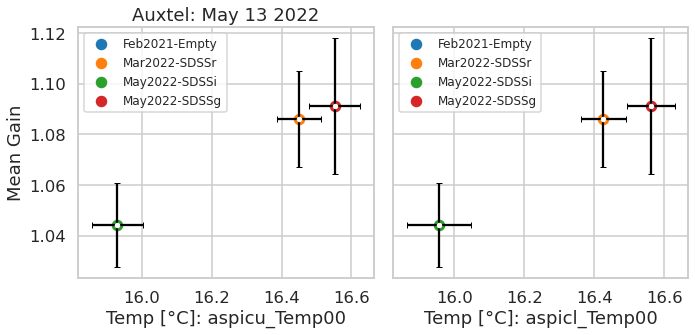

In [227]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row',figsize=(10,5))
for i in range(len(exposures)):
    ax[0].scatter(temp_data['t2'][i],data['gain'][i],s=100,label=run_names[i])
ax[0].legend(fontsize=12)
ax[0].errorbar(temp_data['t2'],data['gain'],xerr=temp_data['t2_err'],yerr=data['gain_err'],
             fmt='.w',capsize=3,ecolor='k')

ax[0].set_xlabel('Temp [°C]: aspicu_Temp00')
ax[0].set_ylabel('Mean Gain')
ax[0].set_title('Auxtel: May 13 2022')

for i in range(len(exposures)):
    ax[1].scatter(temp_data['t1'][i],data['gain'][i],s=100,label=run_names[i])
ax[1].legend(fontsize=12)
ax[1].errorbar(temp_data['t1'],data['gain'],xerr=temp_data['t1_err'],yerr=data['gain_err'],
             fmt='.w',capsize=3,ecolor='k')

ax[1].set_xlabel('Temp [°C]: aspicl_Temp00')
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.tight_layout()
fig.savefig(f'./plots/temp_gain_relation_May13.pdf',dpi=100)

Text(0.5, 1.0, 'Auxtel: May 13 2022')

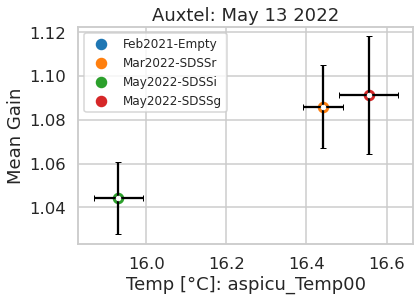

In [220]:
for i in range(len(exposures)):
    plt.scatter(temp_data['t2'][i],data['gain'][i],s=100,label=run_names[i])
plt.legend(fontsize=12)
plt.errorbar(temp_data['t2'],data['gain'],xerr=temp_data['t2_err'],yerr=data['gain_err'],
             fmt='.w',capsize=3,ecolor='k')

plt.xlabel('Temp [°C]: aspicu_Temp00')
plt.ylabel('Mean Gain')
plt.title('Auxtel: May 13 2022')
# plt.xlim(15.8,16.5)

In [95]:
dashboardTime = metadata.toDict()['DATE']
upperDashboardTime = metadata.toDict()['DATE'][:-6]+str(float(metadata.toDict()['DATE'][-6:])+5.)
query = f"""SELECT "aspicl_Temp00", "aspicu_Temp00" FROM "efd"."autogen"."lsst.sal.ATCamera.focal_plane_Reb" WHERE time > :{dashboardTime}: AND time < :{upperDashboardTime}:"""
print(query)


SELECT "aspicl_Temp00", "aspicu_Temp00" FROM "efd"."autogen"."lsst.sal.ATCamera.focal_plane_Reb" WHERE time > :2022-05-05T21:07:12.695: AND time < :2022-05-05T21:07:17.695:


In [118]:
# res = await efd_client.influx_client.query(query)